In [1]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 500
import seaborn as sns
import os
import numpy as np

In [2]:
tgt = []
mem = []
germ = []
aff = []
with open("default_log.txt", "r") as ins:
    for line in ins:
        arr = line.split()
        tgt.append(int(arr[0]))
        mem.append(int(arr[1]))
        germ.append(int(arr[2]))
        aff.append(float(arr[3]))
tgt = np.array(tgt)
mem = np.array(mem)
germ = np.array(germ)
aff = np.array(aff)

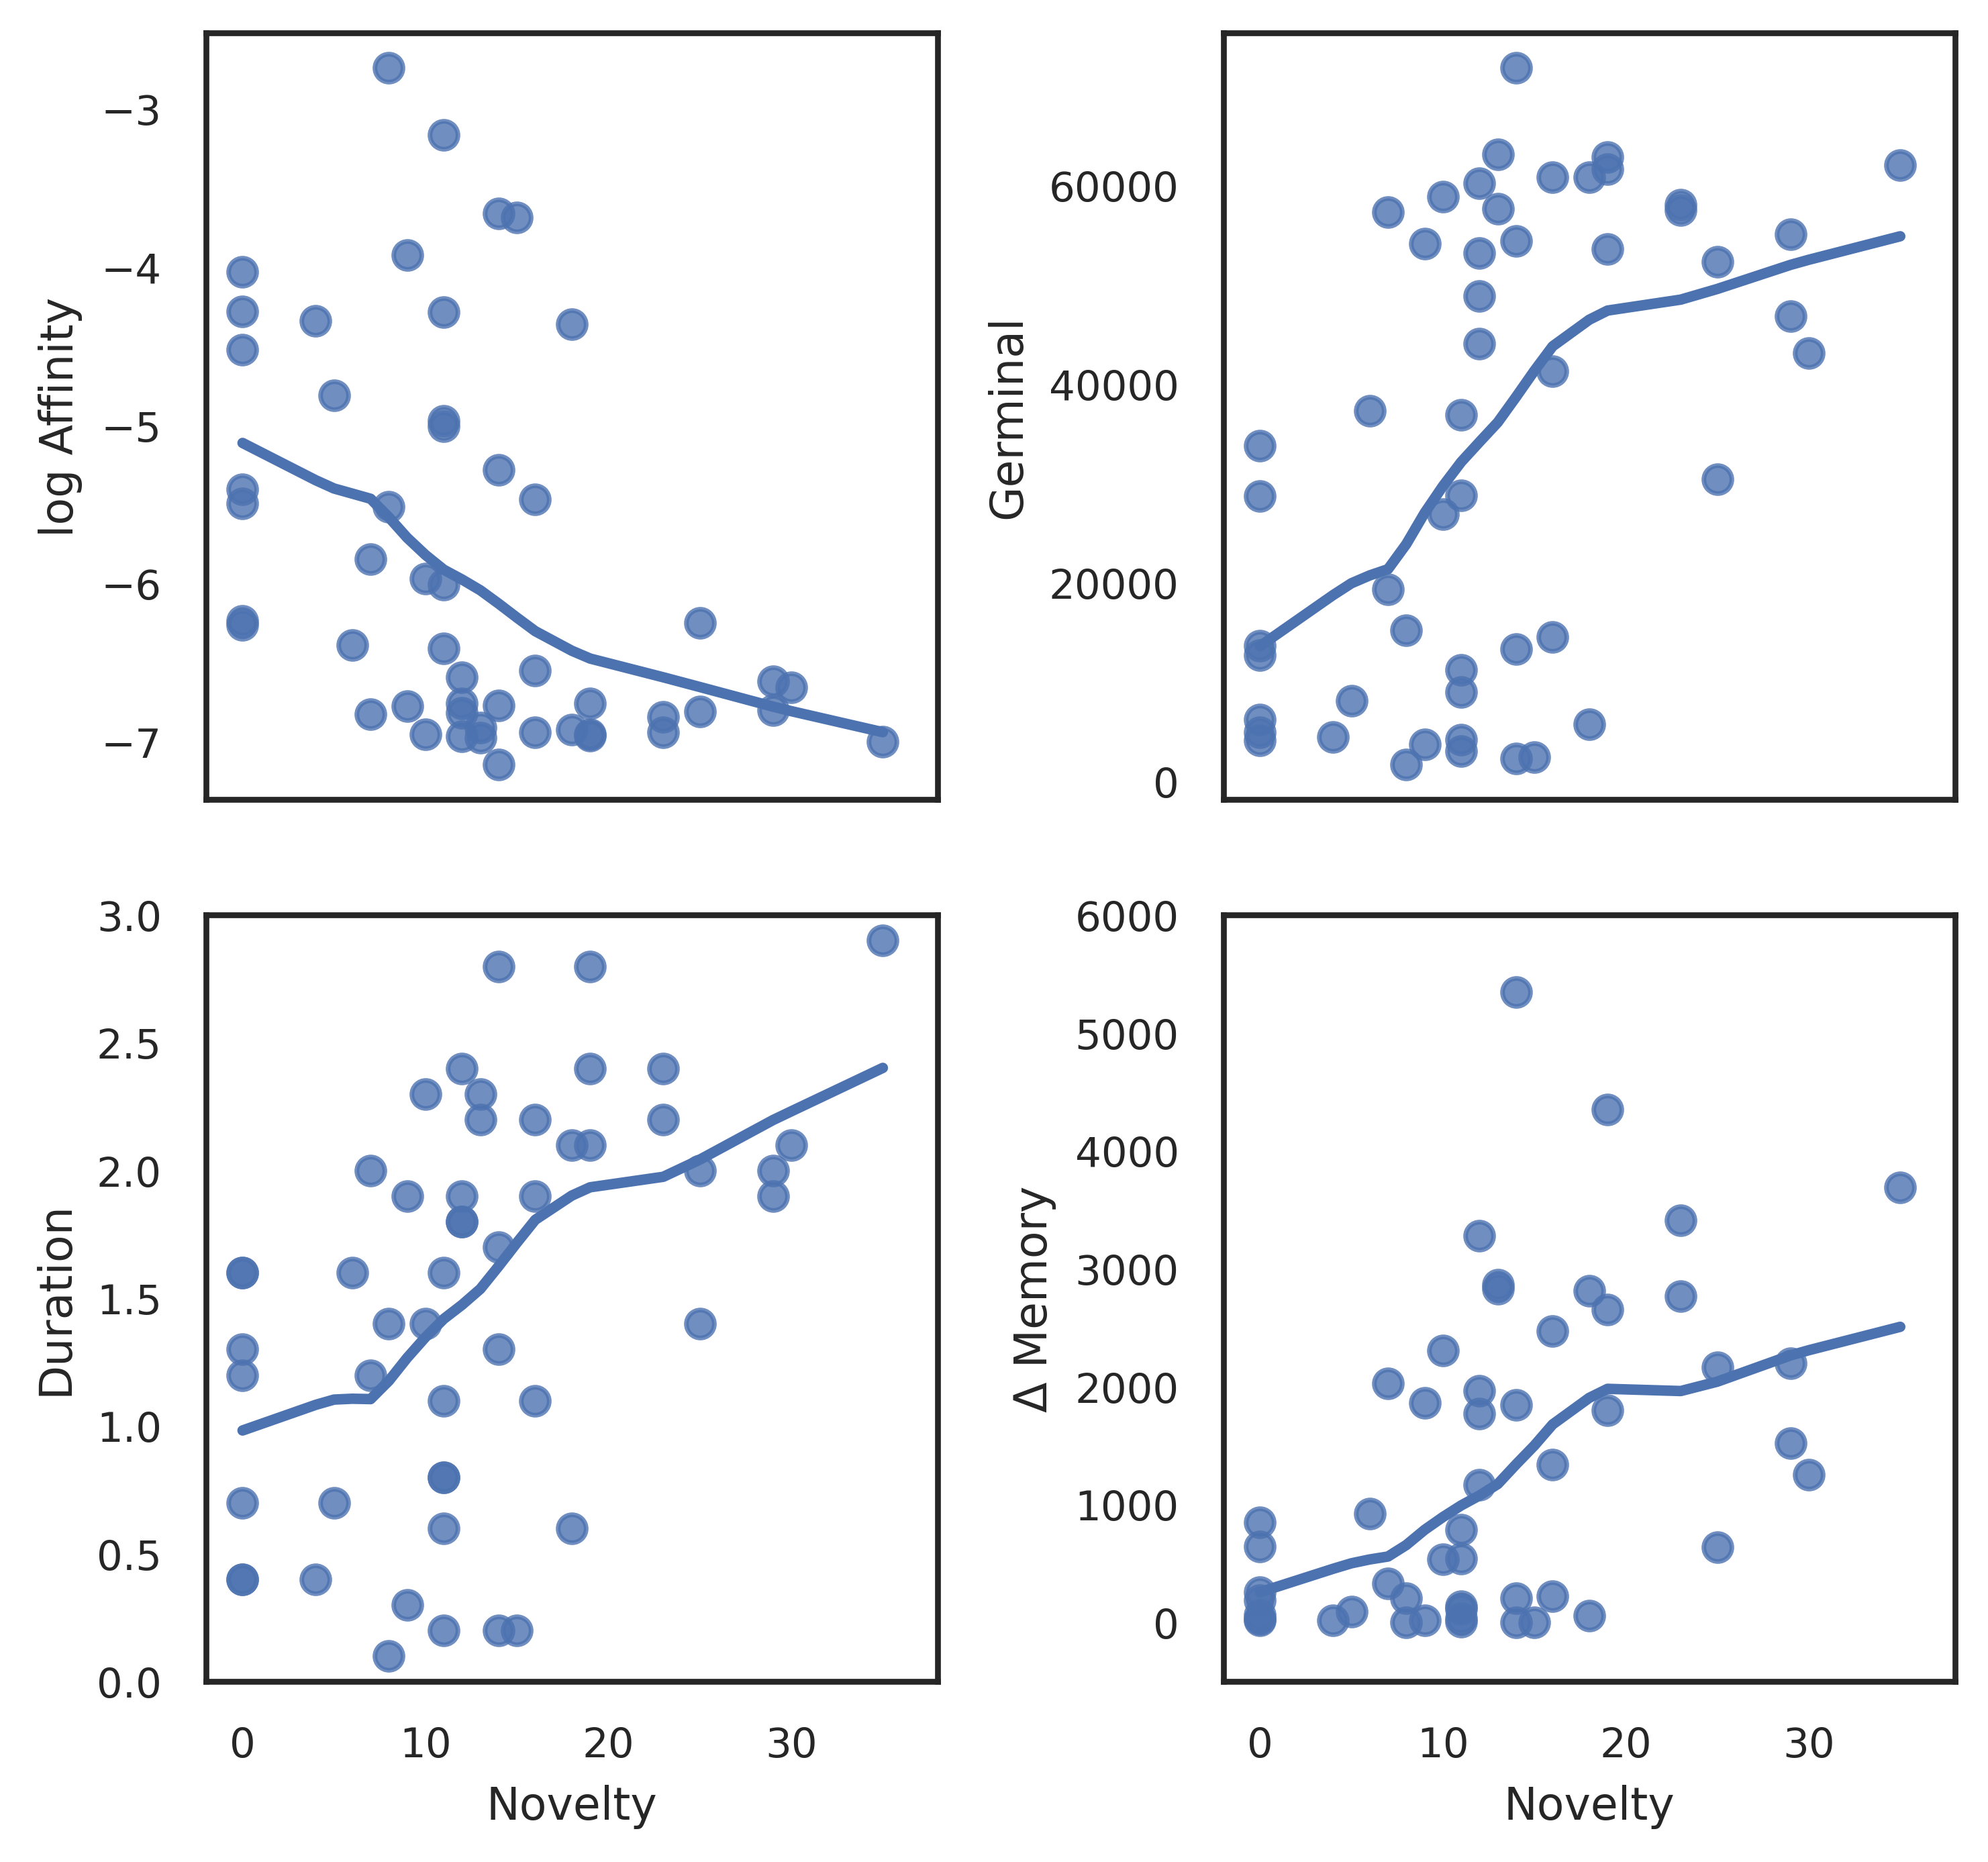

In [7]:
noveltyAll = [11235, 34, 77, 10, 6, 8, 11, 18, 14, 15, 14, 23, 25, 11, 9, 12, 4, 0, 12, 0, 23, 11, 29, 25, 12, 19, 18, 5, 11, 35, 29, 13, 6, 11, 16, 0, 0, 16, 14, 0, 0, 8, 30, 19, 11, 0, 10, 7, 10, 19, 12, 16, 7, 9, 13, 14]
sns.set(font_scale=0.8)
with sns.axes_style("white"):
    fig, axes = plt.subplots(2, 2, sharex=True)
x = noveltyAll[5:]
y0 = np.log([aff[tgt == i][-1] for i in range(6, 57)])
y1 = [germ[tgt == i][-1] for i in range(6, 57)]
y2 = [len(aff[tgt == i]) * 0.1 for i in range(6, 57)]
y3 = [mem[tgt == i][-1] - mem[tgt == i][0] for i in range(6, 57)]
sns.regplot(x, y0, ax = axes[0, 0], fit_reg=True, lowess=True)
sns.regplot(x, y1, ax = axes[0, 1], fit_reg=True, lowess=True)
sns.regplot(x, y2, ax = axes[1, 0], fit_reg=True, lowess=True)
sns.regplot(x, y3, ax = axes[1, 1], fit_reg=True, lowess=True)
#sns.regplot(x, y0, ax = axes[0, 0], fit_reg=True)
#sns.regplot(x, y1, ax = axes[0, 1], fit_reg=True)
#sns.regplot(x, y2, ax = axes[1, 0], fit_reg=True)
#sns.regplot(x, y3, ax = axes[1, 1], fit_reg=True)
axes[0, 0].set_ylabel("log Affinity")
#axes[0, 0].set_xlabel("Novelty")
axes[0, 1].set_ylabel("Germinal")
#axes[0, 1].set_xlabel("Novelty")
axes[1, 0].set_ylabel("Duration")
axes[1, 0].set_ylim(0, 3)
axes[1, 0].set_xlim(-2, 38)
axes[1, 0].set_xlabel("Novelty")
axes[1, 1].set_ylim(-500, 6000)
axes[1, 1].set_xlabel("Novelty")
axes[1, 1].set_ylabel(u"Δ Memory")
plt.tight_layout()
sns.set(font_scale=1)
fig.set_size_inches(6, 6)
plt.savefig("novelty.pdf")

In [6]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y0)
stats.linregress(x,y0), stats.linregress(x,y1), stats.linregress(x,y2), stats.linregress(x,y3)

(LinregressResult(slope=-0.06142966253112294, intercept=-5.064234591762209, rvalue=-0.42727011864648196, pvalue=0.0017654330647367464, stderr=0.018569729440400376),
 LinregressResult(slope=1393.3252940003988, intercept=15932.161916151745, rvalue=0.5062438273493612, pvalue=0.0001505759567512348, stderr=339.0772477607819),
 LinregressResult(slope=0.04596040130223908, intercept=0.9067038734967775, rvalue=0.5007008435599832, pvalue=0.00018260026122327274, stderr=0.011351021034431072),
 LinregressResult(slope=78.82315128562892, intercept=296.6795893960526, rvalue=0.49847313052825115, pvalue=0.00019713195793661856, stderr=19.58328674403397))